In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar100/meta
/kaggle/input/cifar100/file.txt
/kaggle/input/cifar100/test
/kaggle/input/cifar100/train
/kaggle/input/testcifar100/cloud_2.jpg
/kaggle/input/testcifar100/cloud_1.jpg
/kaggle/input/testcifar100/mouse_test.jpg
/kaggle/input/testcifar100/lizard_test1.jpg
/kaggle/input/testcifar100/tiger.jpg


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import RMSprop
from skimage import color

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

169017344/169001437 [==============================] - 5s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

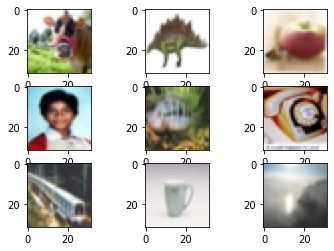

In [4]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [5]:
cifar_100_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 
                   'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
                   'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 
                   'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
                   'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 
                   'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
                   'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 
                   'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
                   'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 
                   'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
                   'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 
                   'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
                   'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                   'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 
                   'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
                   'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 
                   'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
                   'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [6]:
name_of_labels = []
for i in range(len(cifar_100_labels)):
    name_of_labels += [i]

reverse_mapping = dict(zip(name_of_labels, cifar_100_labels)) 

def mapper(value):
    return reverse_mapping[value]

In [7]:
X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(50000, 32, 32)
(10000, 32, 32)


In [8]:
X_train = X_train.reshape(50000, 1024)
X_test = X_test.reshape(10000, 1024)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 1024)
(10000, 1024)
(50000, 100)
(10000, 100)


In [9]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

2022-05-16 11:52:24.381814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 11:52:24.507832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 11:52:24.508771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 11:52:24.510128: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 100, verbose = 1, validation_data = (X_test, y_test))

2022-05-16 11:52:28.310285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
391/391 [==============================] - 4s 5ms/step - loss: 4.4730 - accuracy: 0.0264 - val_loss: 4.3412 - val_accuracy: 0.0462
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 4.2844 - accuracy: 0.0548 - val_loss: 4.2426 - val_accuracy: 0.0720
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 4.1855 - accuracy: 0.0695 - val_loss: 4.1316 - val_accuracy: 0.0851
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 4.1248 - accuracy: 0.0790 - val_loss: 4.1066 - val_accuracy: 0.0819
Epoch 5/100
391/391 [==============================] - 2s 4ms/step - loss: 4.0729 - accuracy: 0.0876 - val_loss: 4.0557 - val_accuracy: 0.0945
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 4.0343 - accuracy: 0.0942 - val_loss: 4.0445 - val_accuracy: 0.1047
Epoch 7/100
391/391 [==============================] - 2s 4ms/step - loss: 3.9974 - accuracy: 0.0989 - val_loss: 3.9397 - val_accuracy: 0.1198

In [12]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 3.8625 - accuracy: 0.1366


In [13]:
model.save('cifar100_ann.h5')

In [14]:
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  3.862480401992798
Test accuracy =  0.13660000264644623


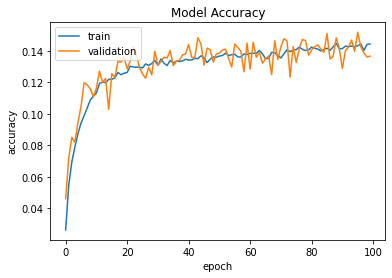

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [16]:
y_pred = model.predict(X_test)

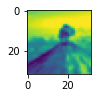

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


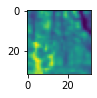

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


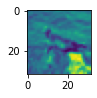

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


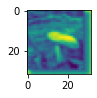

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


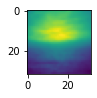

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


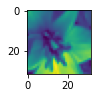

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


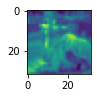

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


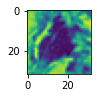

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


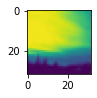

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [17]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i])
  plt.show()  
  print(np.round(y_pred[i]))

Prediction is  keyboard


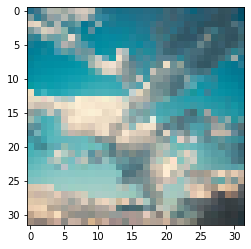

In [18]:
image = tf.keras.preprocessing.image.load_img('../input/testcifar100/cloud_1.jpg', target_size=(32, 32))
plt.imshow(image)
image = tf.keras.preprocessing.image.img_to_array(image) 
image = color.rgb2gray(image)
image = image.reshape(1, 1024)
image = image.astype('float32')
image /= 255
# Get prediction
prediction = model.predict(image)
value = np.argmax(prediction)
name = mapper(value)
print("Prediction is ", name)